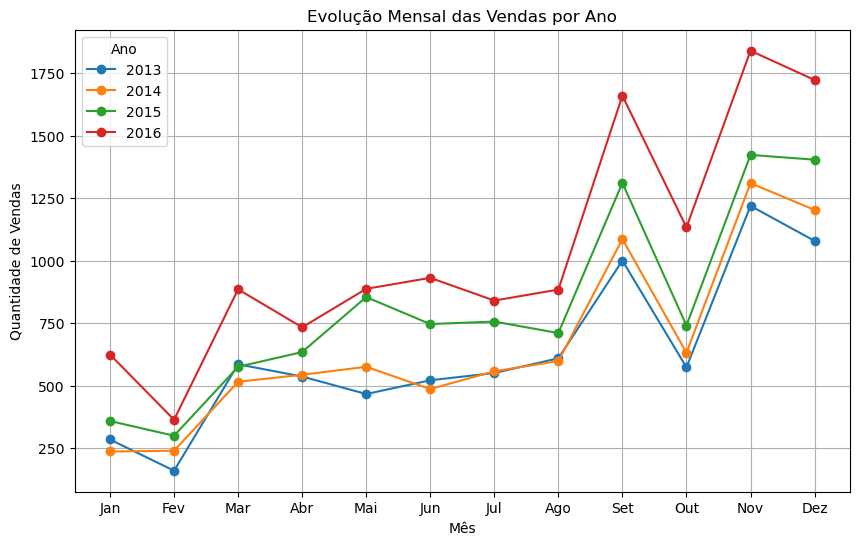

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir o caminho e os anos
file_path = "Data/dados_amr.xlsx"
anos = [2013, 2014, 2015, 2016]

# Preparar o DataFrame para plotar
vendas_mensais_por_ano = {}

for ano in anos:
    df = pd.read_excel(file_path, sheet_name=f'Pedidos_{ano}')
    df['mes'] = pd.to_datetime(df['data_pedido']).dt.month
    vendas_mensais = df.groupby('mes')['quantidade'].sum()
    vendas_mensais_por_ano[ano] = vendas_mensais

# Unir todos em um único DataFrame para plotagem
df_vendas_mensais = pd.DataFrame(vendas_mensais_por_ano)

# Plotar gráfico de linhas
df_vendas_mensais.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Evolução Mensal das Vendas por Ano')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Ano')
plt.grid(True)
plt.show()


Ano com maior volume de vendas: 2016 com 12503 itens vendidos.


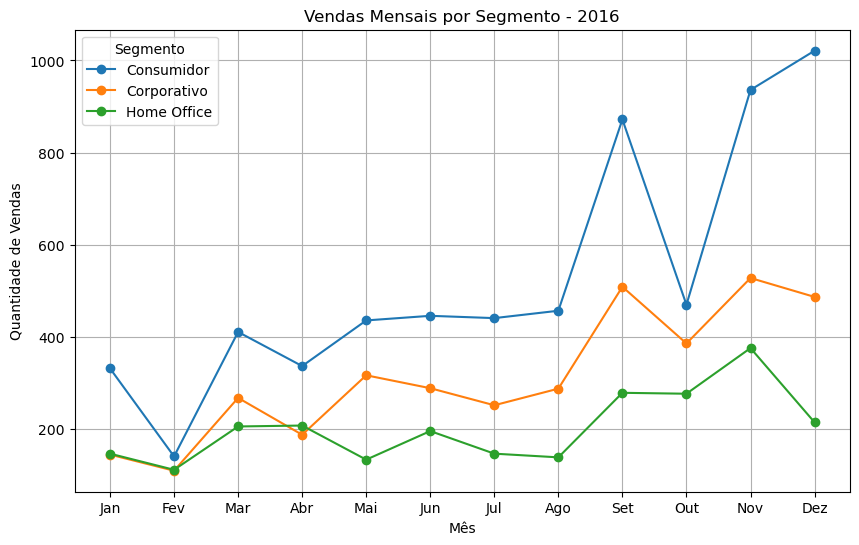

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir o caminho e os anos
file_path = "dados_amr.xlsx"
anos = [2013, 2014, 2015, 2016]

# Variáveis para armazenar o ano com maior volume
maior_volume = 0
ano_maior_volume = None
df_maior_volume = None

# Determinar o ano com maior quantidade de vendas
for ano in anos:
    df = pd.read_excel(file_path, sheet_name=f'Pedidos_{ano}')
    volume_total = df['quantidade'].sum()
    if volume_total > maior_volume:
        maior_volume = volume_total
        ano_maior_volume = ano
        df_maior_volume = df

print(f"Ano com maior volume de vendas: {ano_maior_volume} com {maior_volume} itens vendidos.")

# Adicionar coluna do mês
df_maior_volume['mes'] = pd.to_datetime(df_maior_volume['data_pedido']).dt.month

# Agrupar por mês e segmento, somar as quantidades
resumo_mensal_segmento = df_maior_volume.groupby(['mes', 'segmento'])['quantidade'].sum().unstack()

# Plotar gráfico de linhas
resumo_mensal_segmento.plot(kind='line', marker='o', figsize=(10, 6))
plt.title(f'Vendas Mensais por Segmento - {ano_maior_volume}')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Segmento')
plt.grid(True)
plt.show()
